In [1]:
!python -m pip install amazon-textract-caller --upgrade
!python -m pip install amazon-textract-response-parser --upgrade


/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrad

In [2]:
import boto3
from IPython.display import Image, display
from trp import Document
from PIL import Image as PImage, ImageDraw
import time
from IPython.display import IFrame

In [3]:

# Amazon Textract client
textract = boto3.client('textract')

# 1. Detect text from local image

https://docs.aws.amazon.com/textract/latest/dg/API_DetectDocumentText.html

In [4]:
# Document
documentName = "simple-document-image.jpg"

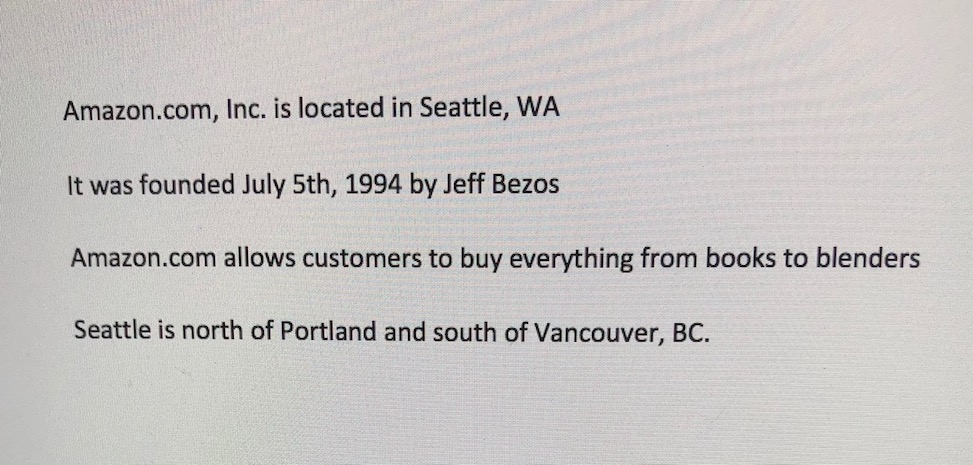

In [5]:
display(Image(filename=documentName))

In [6]:
# Read document content
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

# Call Amazon Textract
response = textract.detect_document_text(Document={'Bytes': imageBytes})

# Print detected text
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print (item["Text"])

Amazon.com, Inc. is located in Seattle, WA
It was founded July 5th, 1994 by Jeff Bezos
Amazon.com allows customers to buy everything from books to blenders
Seattle is north of Portland and south of Vancouver, BC.


In [ ]:
print(response)

## Lines and Words of Text - JSON Structure

https://docs.aws.amazon.com/textract/latest/dg/API_BoundingBox.html

https://docs.aws.amazon.com/textract/latest/dg/text-location.html

https://docs.aws.amazon.com/textract/latest/dg/how-it-works-lines-words.html

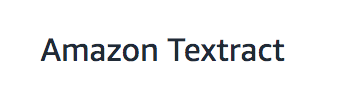

Amazon Textract


In [7]:
# Document
documentName = "OneLine.png"
display(Image(filename=documentName))
# Read document content
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

# Call Amazon Textract
response = textract.detect_document_text(Document={'Bytes': imageBytes})

# Print detected text
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print (item["Text"])

In [8]:
print("JSON Response\n===================")
display(response)

JSON Response


{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 0.9985673427581787,
     'Height': 1.0,
     'Left': 0.0,
     'Top': 0.0},
    'Polygon': [{'X': 0.0, 'Y': 0.0},
     {'X': 0.9985673427581787, 'Y': 4.546826803444577e-16},
     {'X': 0.9985673427581787, 'Y': 1.0},
     {'X': 0.0, 'Y': 1.0}]},
   'Id': '754617eb-af16-4515-8c49-5b377eea6f79',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['712b9901-7cda-48b9-ae31-10a8d500290c']}]},
  {'BlockType': 'LINE',
   'Confidence': 99.81717681884766,
   'Text': 'Amazon Textract',
   'Geometry': {'BoundingBox': {'Width': 0.7116634845733643,
     'Height': 0.28216034173965454,
     'Left': 0.11438673734664917,
     'Top': 0.39771896600723267},
    'Polygon': [{'X': 0.11438673734664917, 'Y': 0.39771896600723267},
     {'X': 0.8260502219200134, 'Y': 0.39771896600723267},
     {'X': 0.8260502219200134, 'Y': 0.6798793077468872},
     {'X': 0.11438673734664917, 'Y': 0.6798793077468872}]},


# 2. Reading order

In [10]:
# Document
documentName = "two-column-image.jpg"

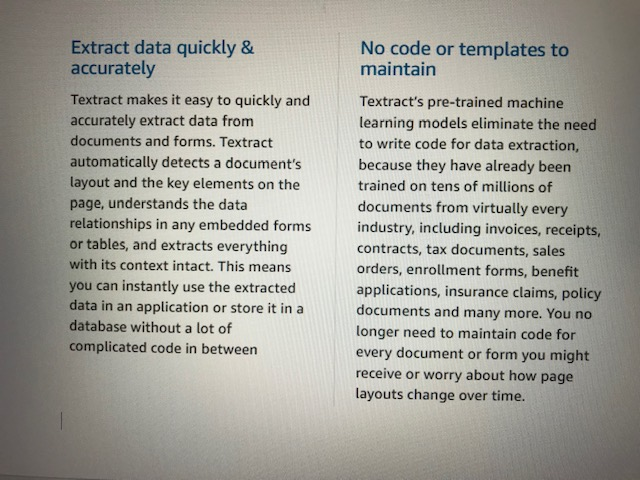

In [11]:
display(Image(filename=documentName))

In [12]:
# Read document content
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

In [14]:
# Call Amazon Textract
response = textract.detect_document_text(Document={'Bytes': imageBytes})

#print(response)

# Detect columns and print lines
columns = []
lines = []
for item in response["Blocks"]:
      if item["BlockType"] == "LINE":
        column_found=False
        for index, column in enumerate(columns):
            bbox_left = item["Geometry"]["BoundingBox"]["Left"]
            bbox_right = item["Geometry"]["BoundingBox"]["Left"] + item["Geometry"]["BoundingBox"]["Width"]
            bbox_centre = item["Geometry"]["BoundingBox"]["Left"] + item["Geometry"]["BoundingBox"]["Width"]/2
            column_centre = column['left'] + column['right']/2

            if (bbox_centre > column['left'] and bbox_centre < column['right']) or (column_centre > bbox_left and column_centre < bbox_right):
                #Bbox appears inside the column
                lines.append([index, item["Text"]])
                column_found=True
                break
        if not column_found:
            columns.append({'left':item["Geometry"]["BoundingBox"]["Left"], 'right':item["Geometry"]["BoundingBox"]["Left"] + item["Geometry"]["BoundingBox"]["Width"]})
            lines.append([len(columns)-1, item["Text"]])

lines.sort(key=lambda x: x[0])
for line in lines:
    print (line[1])

Extract data quickly &
accurately
Textract makes it easy to quickly and
accurately extract data from
documents and forms. Textract
automatically detects a document's
layout and the key elements on the
page, understands the data
relationships in any embedded forms
or tables, and extracts everything
with its context intact. This means
you can instantly use the extracted
data in an application or store it in a
database without a lot of
complicated code in between
No code or templates to
maintain
Textract's pre-trained machine
learning models eliminate the need
to write code for data extraction,
because they have already been
trained on tens of millions of
documents from virtually every
industry, including invoices, receipts,
contracts, tax documents, sales
orders, enrollment forms, benefit
applications, insurance claims, policy
documents and many more. You no
longer need to maintain code for
every document or form you might
receive or worry about how page
layouts change over time.


# 3. Forms: Key/Values

https://docs.aws.amazon.com/textract/latest/dg/API_AnalyzeDocument.html

In [15]:
# Document
documentName = "employmentapp.png"

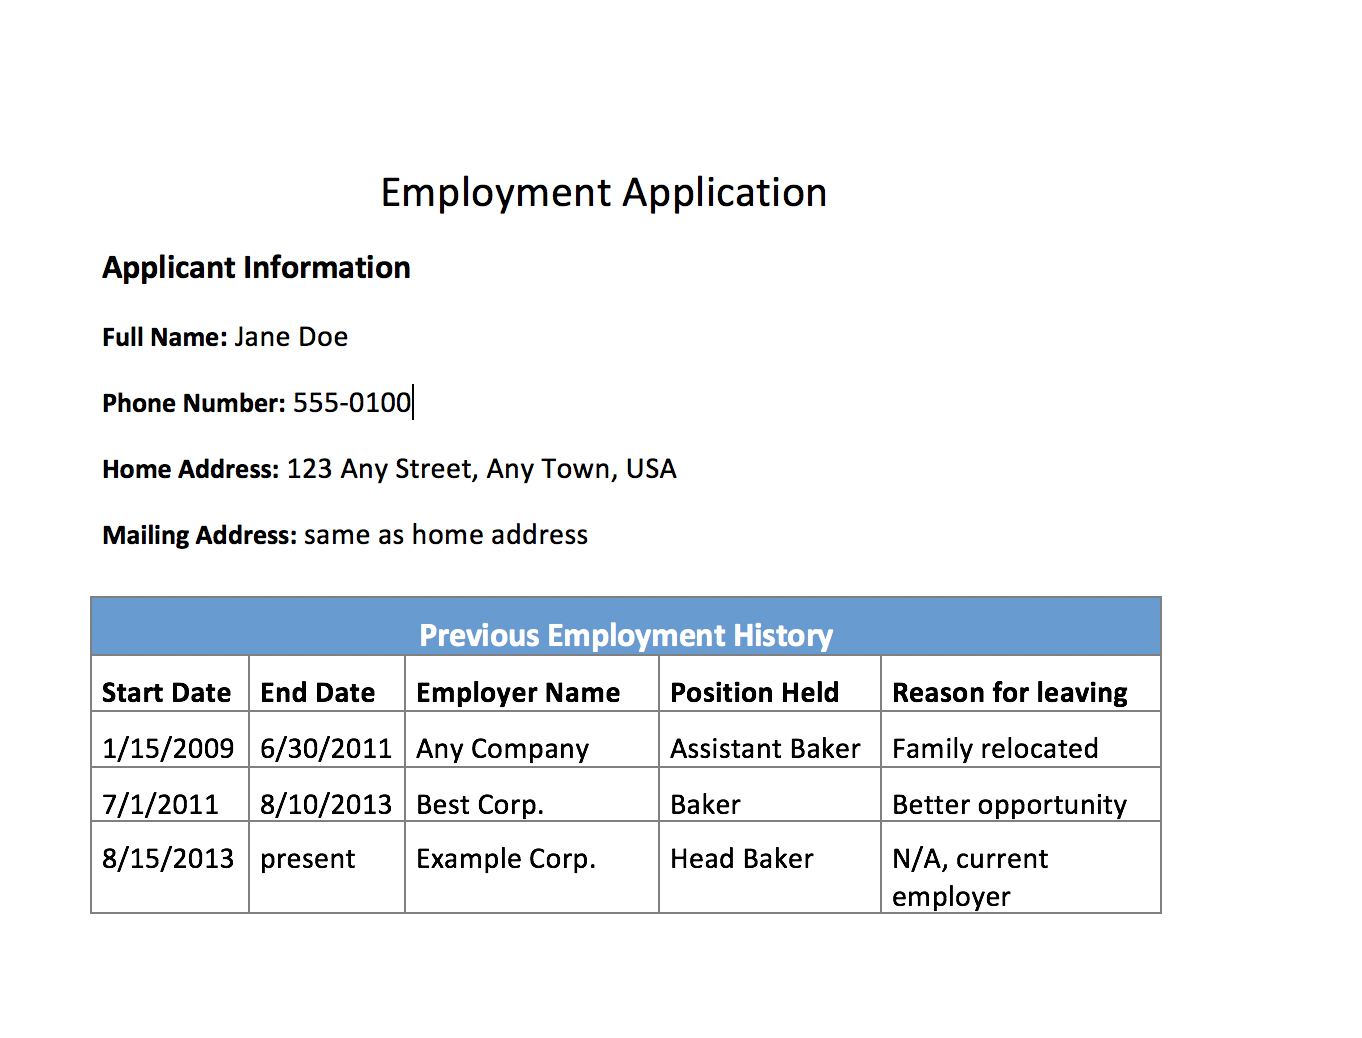

In [16]:
display(Image(filename=documentName))

# Read document content
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

In [17]:
# Call Amazon Textract
response = textract.analyze_document(
    Document={'Bytes': imageBytes},
    FeatureTypes=["FORMS"])

#print(response)

doc = Document(response)

for page in doc.pages:
    # Print fields
    print("Fields:")
    for field in page.form.fields:
        print("Key: {}, Value: {}".format(field.key, field.value))

    # Get field by key
    print("\nGet Field by Key:")
    key = "Phone Number:"
    field = page.form.getFieldByKey(key)
    if(field):
        print("Key: {}, Value: {}".format(field.key, field.value))

    # Search fields by key
    print("\nSearch Fields:")
    key = "address"
    fields = page.form.searchFieldsByKey(key)
    for field in fields:
        print("Key: {}, Value: {}".format(field.key, field.value))

Fields:
Key: Home Address:, Value: 123 Any Street, Any Town, USA
Key: Mailing Address:, Value: same as home address
Key: Phone Number:, Value: 555-0100
Key: Full Name:, Value: Jane Doe

Get Field by Key:
Key: Phone Number:, Value: 555-0100

Search Fields:
Key: Home Address:, Value: 123 Any Street, Any Town, USA
Key: Mailing Address:, Value: same as home address


## Form Data (Key-Value Pairs) JSON Structure

https://docs.aws.amazon.com/textract/latest/dg/how-it-works-kvp.html

https://docs.aws.amazon.com/textract/latest/dg/how-it-works-selectables.html


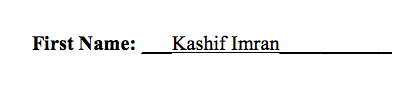

Fields:
Key: First Name:, Value: Kashif Imran


In [18]:
# Document
documentName = "OneKeyValue.png"
display(Image(filename=documentName))
# Read document content
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

# Call Amazon Textract
response = textract.analyze_document(Document={'Bytes': imageBytes}, FeatureTypes=["FORMS"])

doc = Document(response)

for page in doc.pages:
    # Print fields
    print("Fields:")
    for field in page.form.fields:
        print("Key: {}, Value: {}".format(field.key, field.value))

In [19]:
print("JSON Response\n===================")
display(response)

JSON Response


{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 1.0,
     'Height': 1.0,
     'Left': 0.0,
     'Top': 0.0},
    'Polygon': [{'X': 2.7281736782256487e-17, 'Y': 0.0},
     {'X': 1.0, 'Y': 5.497303649382309e-16},
     {'X': 1.0, 'Y': 1.0},
     {'X': 0.0, 'Y': 1.0}]},
   'Id': '73d8df50-6b89-49a4-805e-f987b7a817f1',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['bcda7f7c-c430-43cf-a2f9-0a886987f813',
      '8fb0482a-083b-46ce-aca3-d2aa87a2be9b',
      'c327c366-be91-430b-93b0-113d6784fb8b',
      '4afc3009-25b3-47ec-90e0-8a8684cd195c']}]},
  {'BlockType': 'LINE',
   'Confidence': 99.86605072021484,
   'Text': 'First Name:',
   'Geometry': {'BoundingBox': {'Width': 0.2617547810077667,
     'Height': 0.19944661855697632,
     'Left': 0.07699709385633469,
     'Top': 0.38779181241989136},
    'Polygon': [{'X': 0.07699709385633469, 'Y': 0.38779181241989136},
     {'X': 0.338751882314682, 'Y': 0.38779181241989136},
     {'X':

https://github.com/aws-samples/amazon-textract-response-parser

https://github.com/aws-samples/amazon-textract-response-parser/blob/master/src-python/trp.py

# 4. Control and Compliance - Redaction

In [20]:
# Document
documentName = "employmentapp.png"

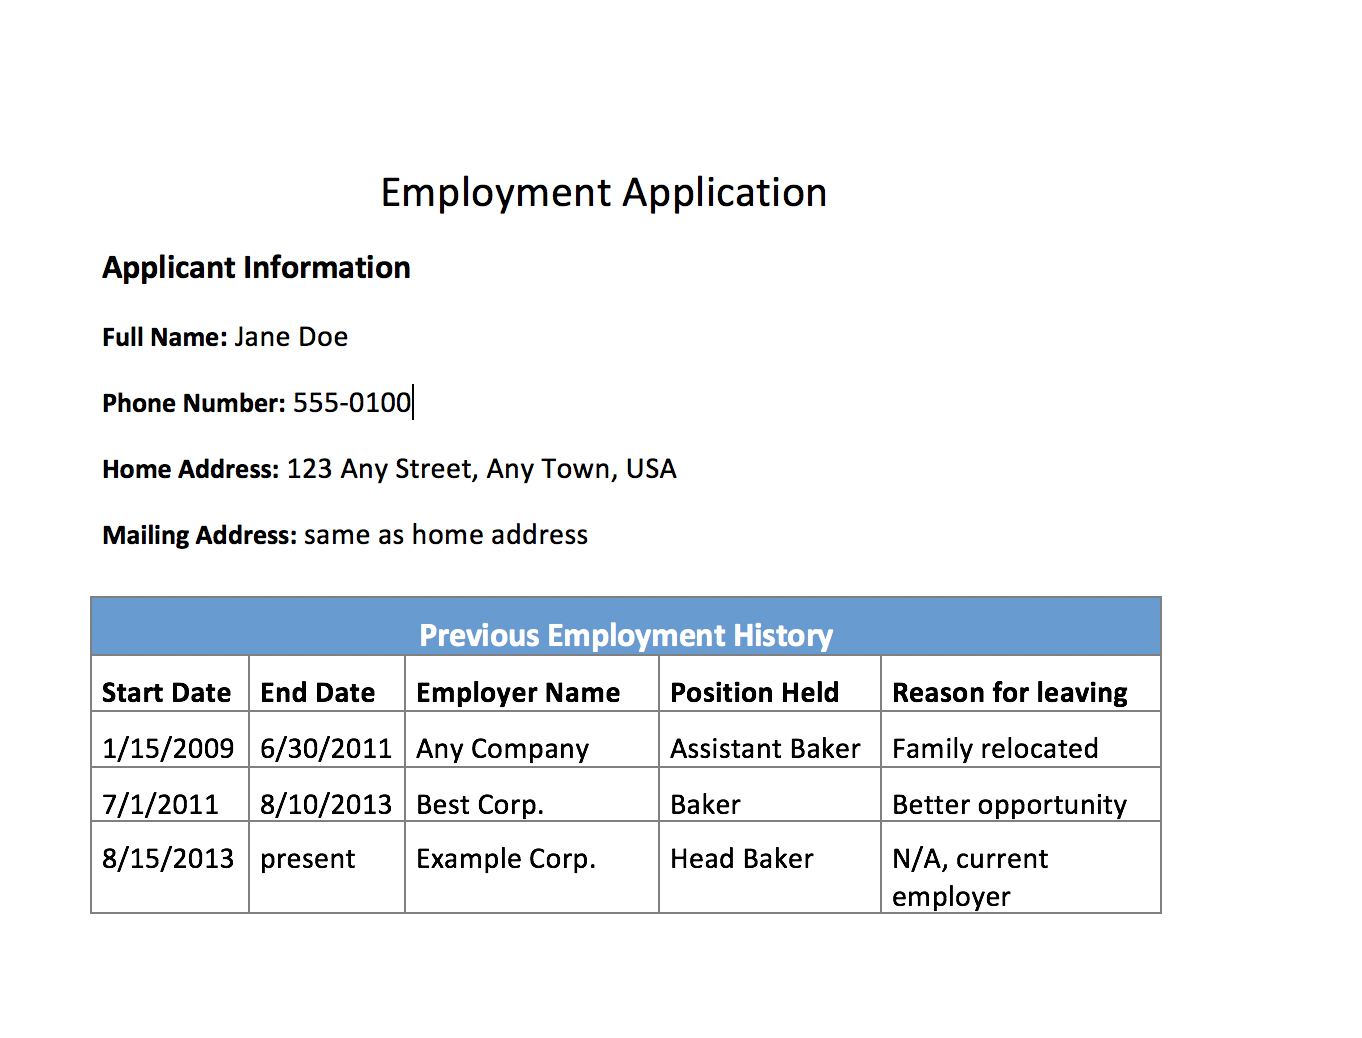

In [21]:
display(Image(filename=documentName))

Redacting => Key: Home Address:, Value: 123 Any Street, Any Town, USA
Redacting => Key: Mailing Address:, Value: same as home address


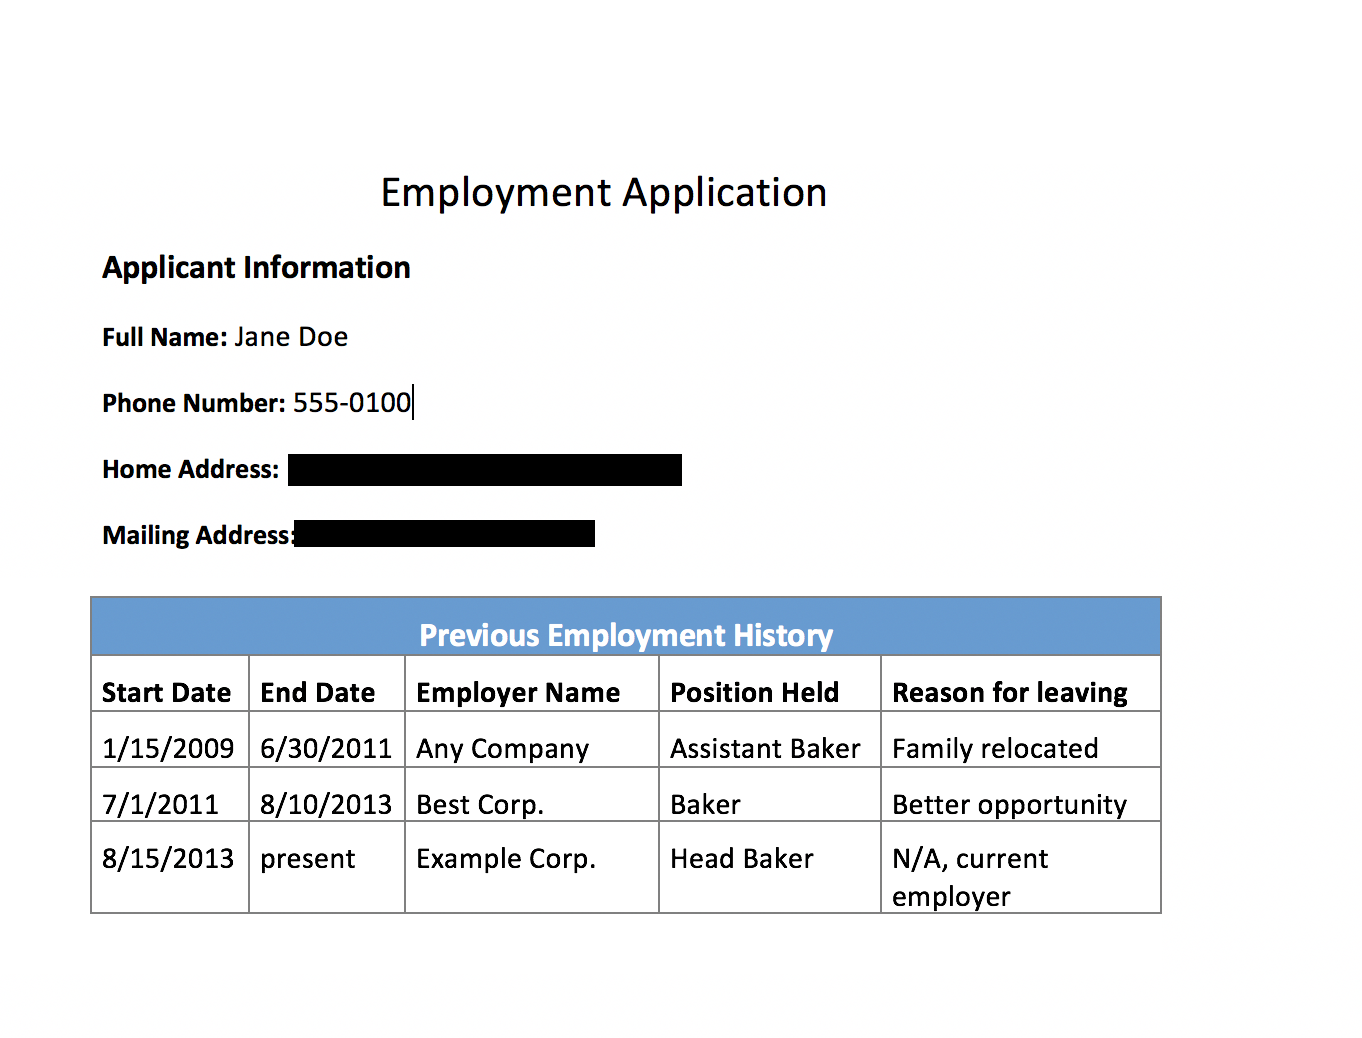

In [22]:
# Call Amazon Textract
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

# Call Amazon Textract
response = textract.analyze_document(Document={'Bytes': imageBytes}, FeatureTypes=["FORMS"])

#print(response)

doc = Document(response)

# Redact document
img = PImage.open(documentName)

width, height = img.size

if(doc.pages):
    page = doc.pages[0]
    for field in page.form.fields:
        if(field.key and field.value and "address" in field.key.text.lower()):
            print("Redacting => Key: {}, Value: {}".format(field.key.text, field.value.text))
            
            x1 = field.value.geometry.boundingBox.left*width
            y1 = field.value.geometry.boundingBox.top*height-2
            x2 = x1 + (field.value.geometry.boundingBox.width*width)+5
            y2 = y1 + (field.value.geometry.boundingBox.height*height)+2

            draw = ImageDraw.Draw(img)
            draw.rectangle([x1, y1, x2, y2], fill="Black")

outputDocumentName = "redacted-{}".format(documentName)
img.save(outputDocumentName)
display(Image(filename=outputDocumentName))

# 5. Tables

In [23]:
# Document
documentName = "employmentapp.png"

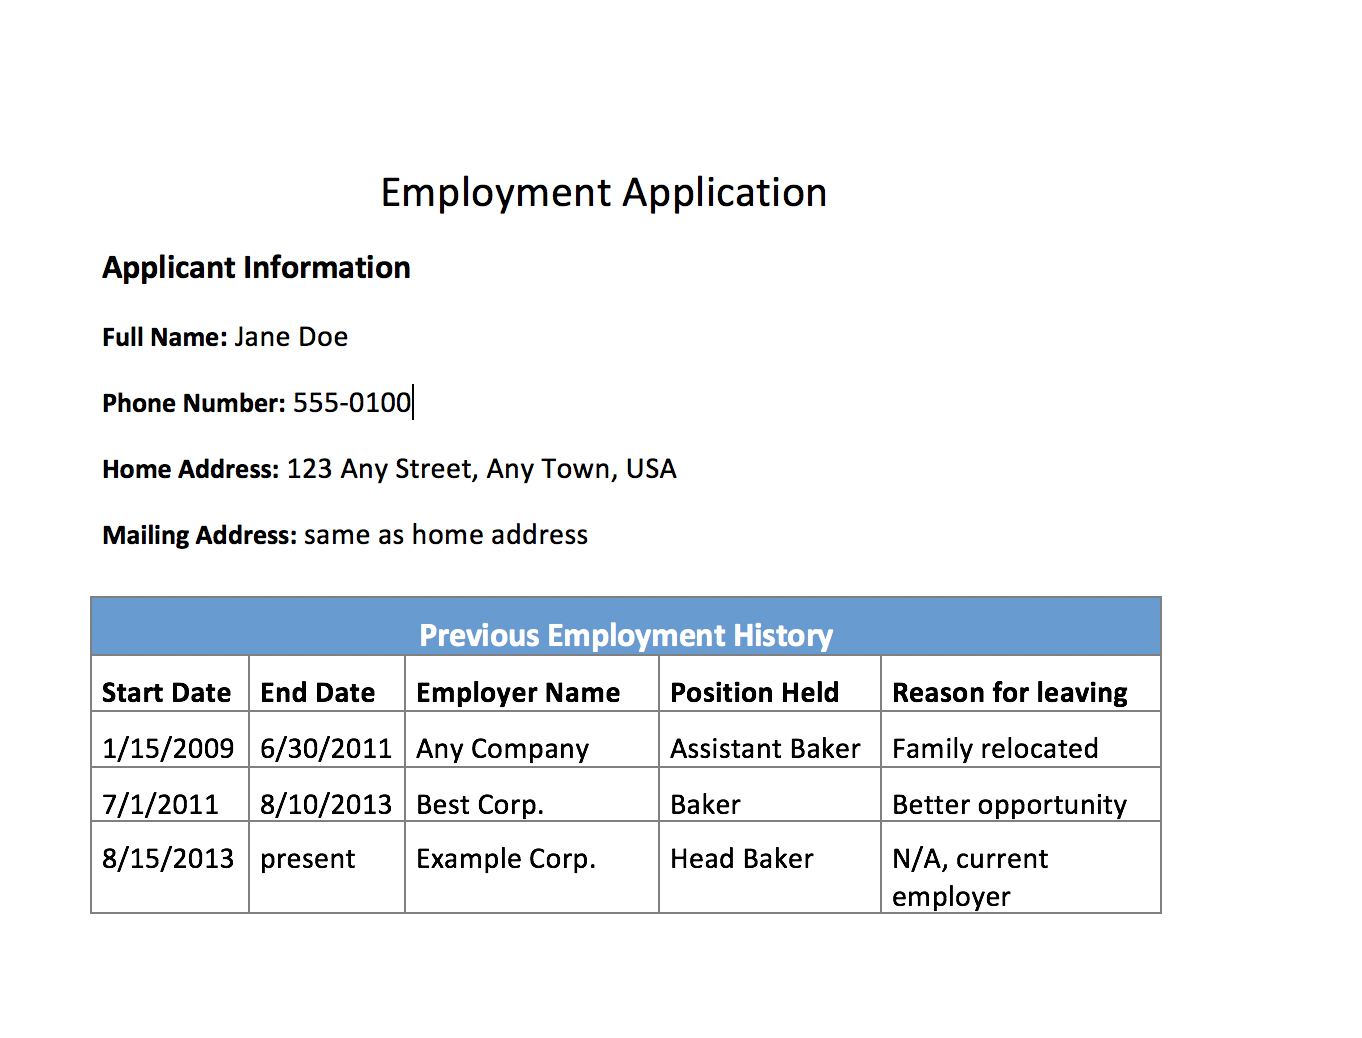

In [24]:
display(Image(filename=documentName))

# Read document content
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

In [25]:
# Call Amazon Textract
response = textract.analyze_document(
    Document={'Bytes': imageBytes},
    FeatureTypes=["TABLES"])

#print(response)

doc = Document(response)

for page in doc.pages:
     # Print tables
    for table in page.tables:
        for r, row in enumerate(table.rows):
            for c, cell in enumerate(row.cells):
                print("Table[{}][{}] = {}".format(r, c, cell.text))

Table[0][0] = 
Table[0][1] = 
Table[0][2] = Previous Employment 
Table[0][3] = History 
Table[0][4] = 
Table[1][0] = Start Date 
Table[1][1] = End Date 
Table[1][2] = Employer Name 
Table[1][3] = Position Held 
Table[1][4] = Reason for leaving 
Table[2][0] = 1/15/2009 
Table[2][1] = 6/30/2011 
Table[2][2] = Any Company 
Table[2][3] = Assistant Baker 
Table[2][4] = Family relocated 
Table[3][0] = 7/1/2011 
Table[3][1] = 8/10/2013 
Table[3][2] = Best Corp. 
Table[3][3] = Baker 
Table[3][4] = Better opportunity 
Table[4][0] = 8/15/2013 
Table[4][1] = present 
Table[4][2] = Example Corp. 
Table[4][3] = Head Baker 
Table[4][4] = N/A, current employer 


# 6. Table Data Validation

In [26]:
# Document
documentName = "expense.png"

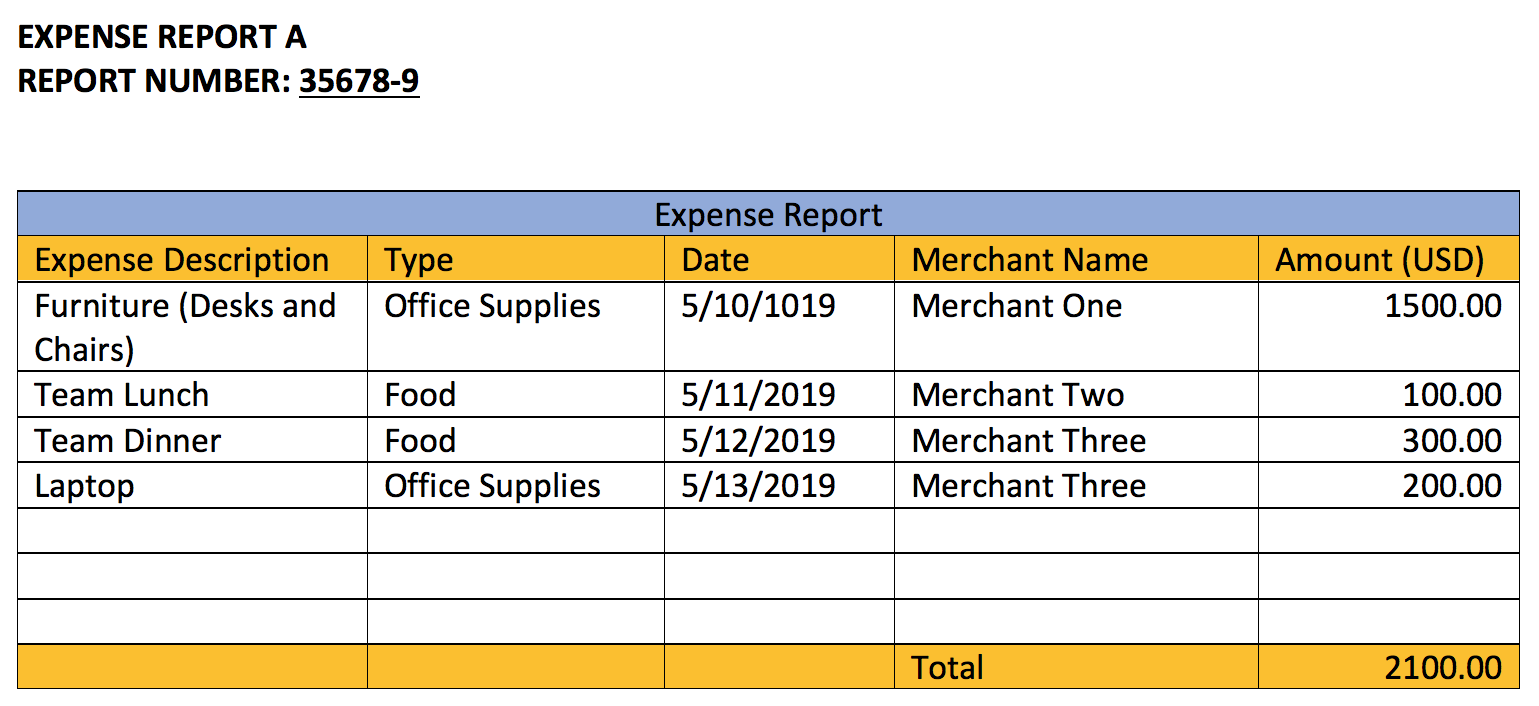

In [27]:
display(Image(filename=documentName))

# Read document content
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

In [28]:
# Call Amazon Textract
response = textract.analyze_document(
    Document={'Bytes': imageBytes},
    FeatureTypes=["TABLES"])

#print(response)

doc = Document(response)

def isFloat(input):
  try:
    float(input)
  except ValueError:
    return False
  return True

warning = ""
for page in doc.pages:
     # Print tables
    for table in page.tables:
        for r, row in enumerate(table.rows):
            itemName  = ""
            for c, cell in enumerate(row.cells):
                print("Table[{}][{}] = {}".format(r, c, cell.text))
                if(c == 0):
                    itemName = cell.text
                elif(c == 4 and isFloat(cell.text)):
                    value = float(cell.text)
                    if(value > 1000):
                        warning += "{} is greater than $1000.".format(itemName)
if(warning):
    print("\nReview needed:\n====================\n" + warning)

Table[0][0] = 
Table[0][1] = 
Table[0][2] = Expense Report 
Table[0][3] = 
Table[0][4] = 
Table[1][0] = Expense Description 
Table[1][1] = Type 
Table[1][2] = Date 
Table[1][3] = Merchant Name 
Table[1][4] = Amount (USD) 
Table[2][0] = Furniture (Desks and Chairs) 
Table[2][1] = Office Supplies 
Table[2][2] = 5/10/1019 
Table[2][3] = Merchant One 
Table[2][4] = 1500.00 
Table[3][0] = Team Lunch 
Table[3][1] = Food 
Table[3][2] = 5/11/2019 
Table[3][3] = Merchant Two 
Table[3][4] = 100.00 
Table[4][0] = Team Dinner 
Table[4][1] = Food 
Table[4][2] = 5/12/2019 
Table[4][3] = Merchant Three 
Table[4][4] = 300.00 
Table[5][0] = Laptop 
Table[5][1] = Office Supplies 
Table[5][2] = 5/13/2019 
Table[5][3] = Merchant Three 
Table[5][4] = 200.00 
Table[6][0] = 
Table[6][1] = 
Table[6][2] = 
Table[6][3] = 
Table[6][4] = 
Table[7][0] = 
Table[7][1] = 
Table[7][2] = 
Table[7][3] = 
Table[7][4] = 
Table[8][0] = 
Table[8][1] = 
Table[8][2] = 
Table[8][3] = 
Table[8][4] = 
Table[9][0] = 
Table[9][1] 

# 7. Invoices and Receipts processing

In [29]:
# Document
documentName = "expense.png"

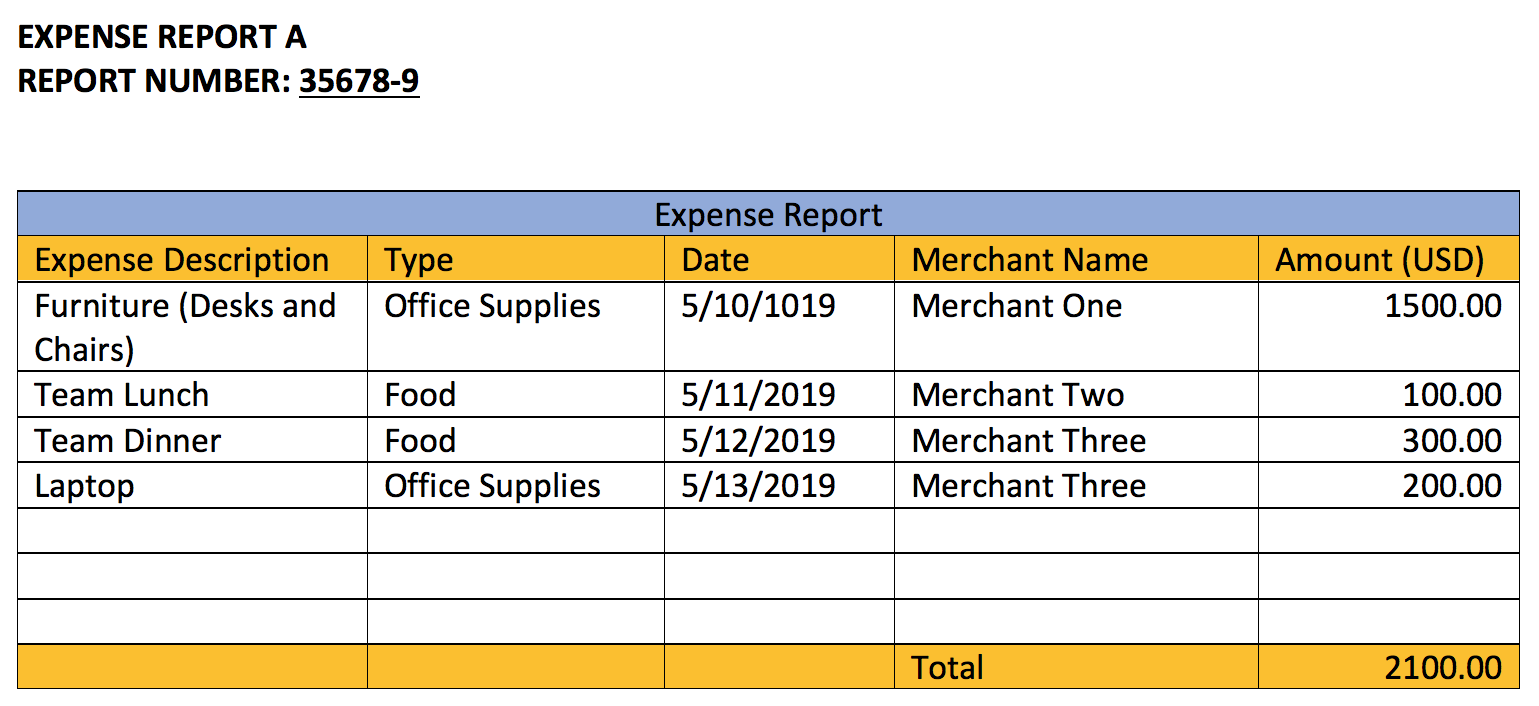

In [30]:
display(Image(filename=documentName))

# Read document content
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

In [32]:
# Call Amazon Textract
response = textract.analyze_expense(Document={'Bytes': imageBytes})

In [33]:

summary_entities_values = []
summary_fields = []
expense_item = []

for expense_doc in response["ExpenseDocuments"]:
    for field in expense_doc["SummaryFields"]:
        kvs = {}
        if "LabelDetection" in field:
            if "ValueDetection" in field:
                kvs[field["LabelDetection"]["Text"]] = field["ValueDetection"]["Text"]
        else:
            kvs[field["Type"]["Text"]] = field["ValueDetection"]["Text"]
        summary_entities_values.append(kvs.copy())
        kvs = None

    for line_item_group in expense_doc["LineItemGroups"]:
            for line_items in line_item_group["LineItems"]:
                for field in line_items["LineItemExpenseFields"]:
                    kvs = {}
                    if "LabelDetection" in field:
                        if "ValueDetection" in field:
                            kvs[field["LabelDetection"]["Text"]] = field["ValueDetection"]["Text"]
                    else:
                        kvs[field["Type"]["Text"]] = field["ValueDetection"]["Text"]
                    expense_item.append(kvs.copy())
                    kvs = None
print("Summary Items:\n")
print(*summary_entities_values, sep='\n')
print("\nExpense Items:\n")
print(*expense_item, sep='\n')

Summary Items:

{'VENDOR_NAME': 'Merchant One'}
{'Merchant Name': 'Merchant One'}
{'Total': '2100.00'}
{'REPORT NUMBER:': '35678-9'}

Expense Items:

{'Expense Description': 'Furniture (Desks and\nChairs)'}
{'Type': 'Office Supplies'}
{'Date': '5/10/1019'}
{'Merchant Name': 'Merchant One'}
{'Amount (USD)': '1500.00'}
{'EXPENSE_ROW': 'Furniture (Desks and\nChairs) Office Supplies 5/10/1019 Merchant One 1500.00'}
{'Expense Description': 'Team Lunch'}
{'Type': 'Food'}
{'Date': '5/11/2019'}
{'Merchant Name': 'Merchant Two'}
{'Amount (USD)': '100.00'}
{'EXPENSE_ROW': 'Team Lunch Food 5/11/2019 Merchant Two 100.00'}
{'Expense Description': 'Team Dinner'}
{'Type': 'Food'}
{'Date': '5/12/2019'}
{'Merchant Name': 'Merchant Three'}
{'Amount (USD)': '300.00'}
{'EXPENSE_ROW': 'Team Dinner Food 5/12/2019 Merchant Three 300.00'}
{'Expense Description': 'Laptop'}
{'Type': 'Office Supplies'}
{'Date': '5/13/2019'}
{'Merchant Name': 'Merchant Three'}
{'Amount (USD)': '200.00'}
{'EXPENSE_ROW': 'Laptop Of

# 8. Textract PrettyPrinter

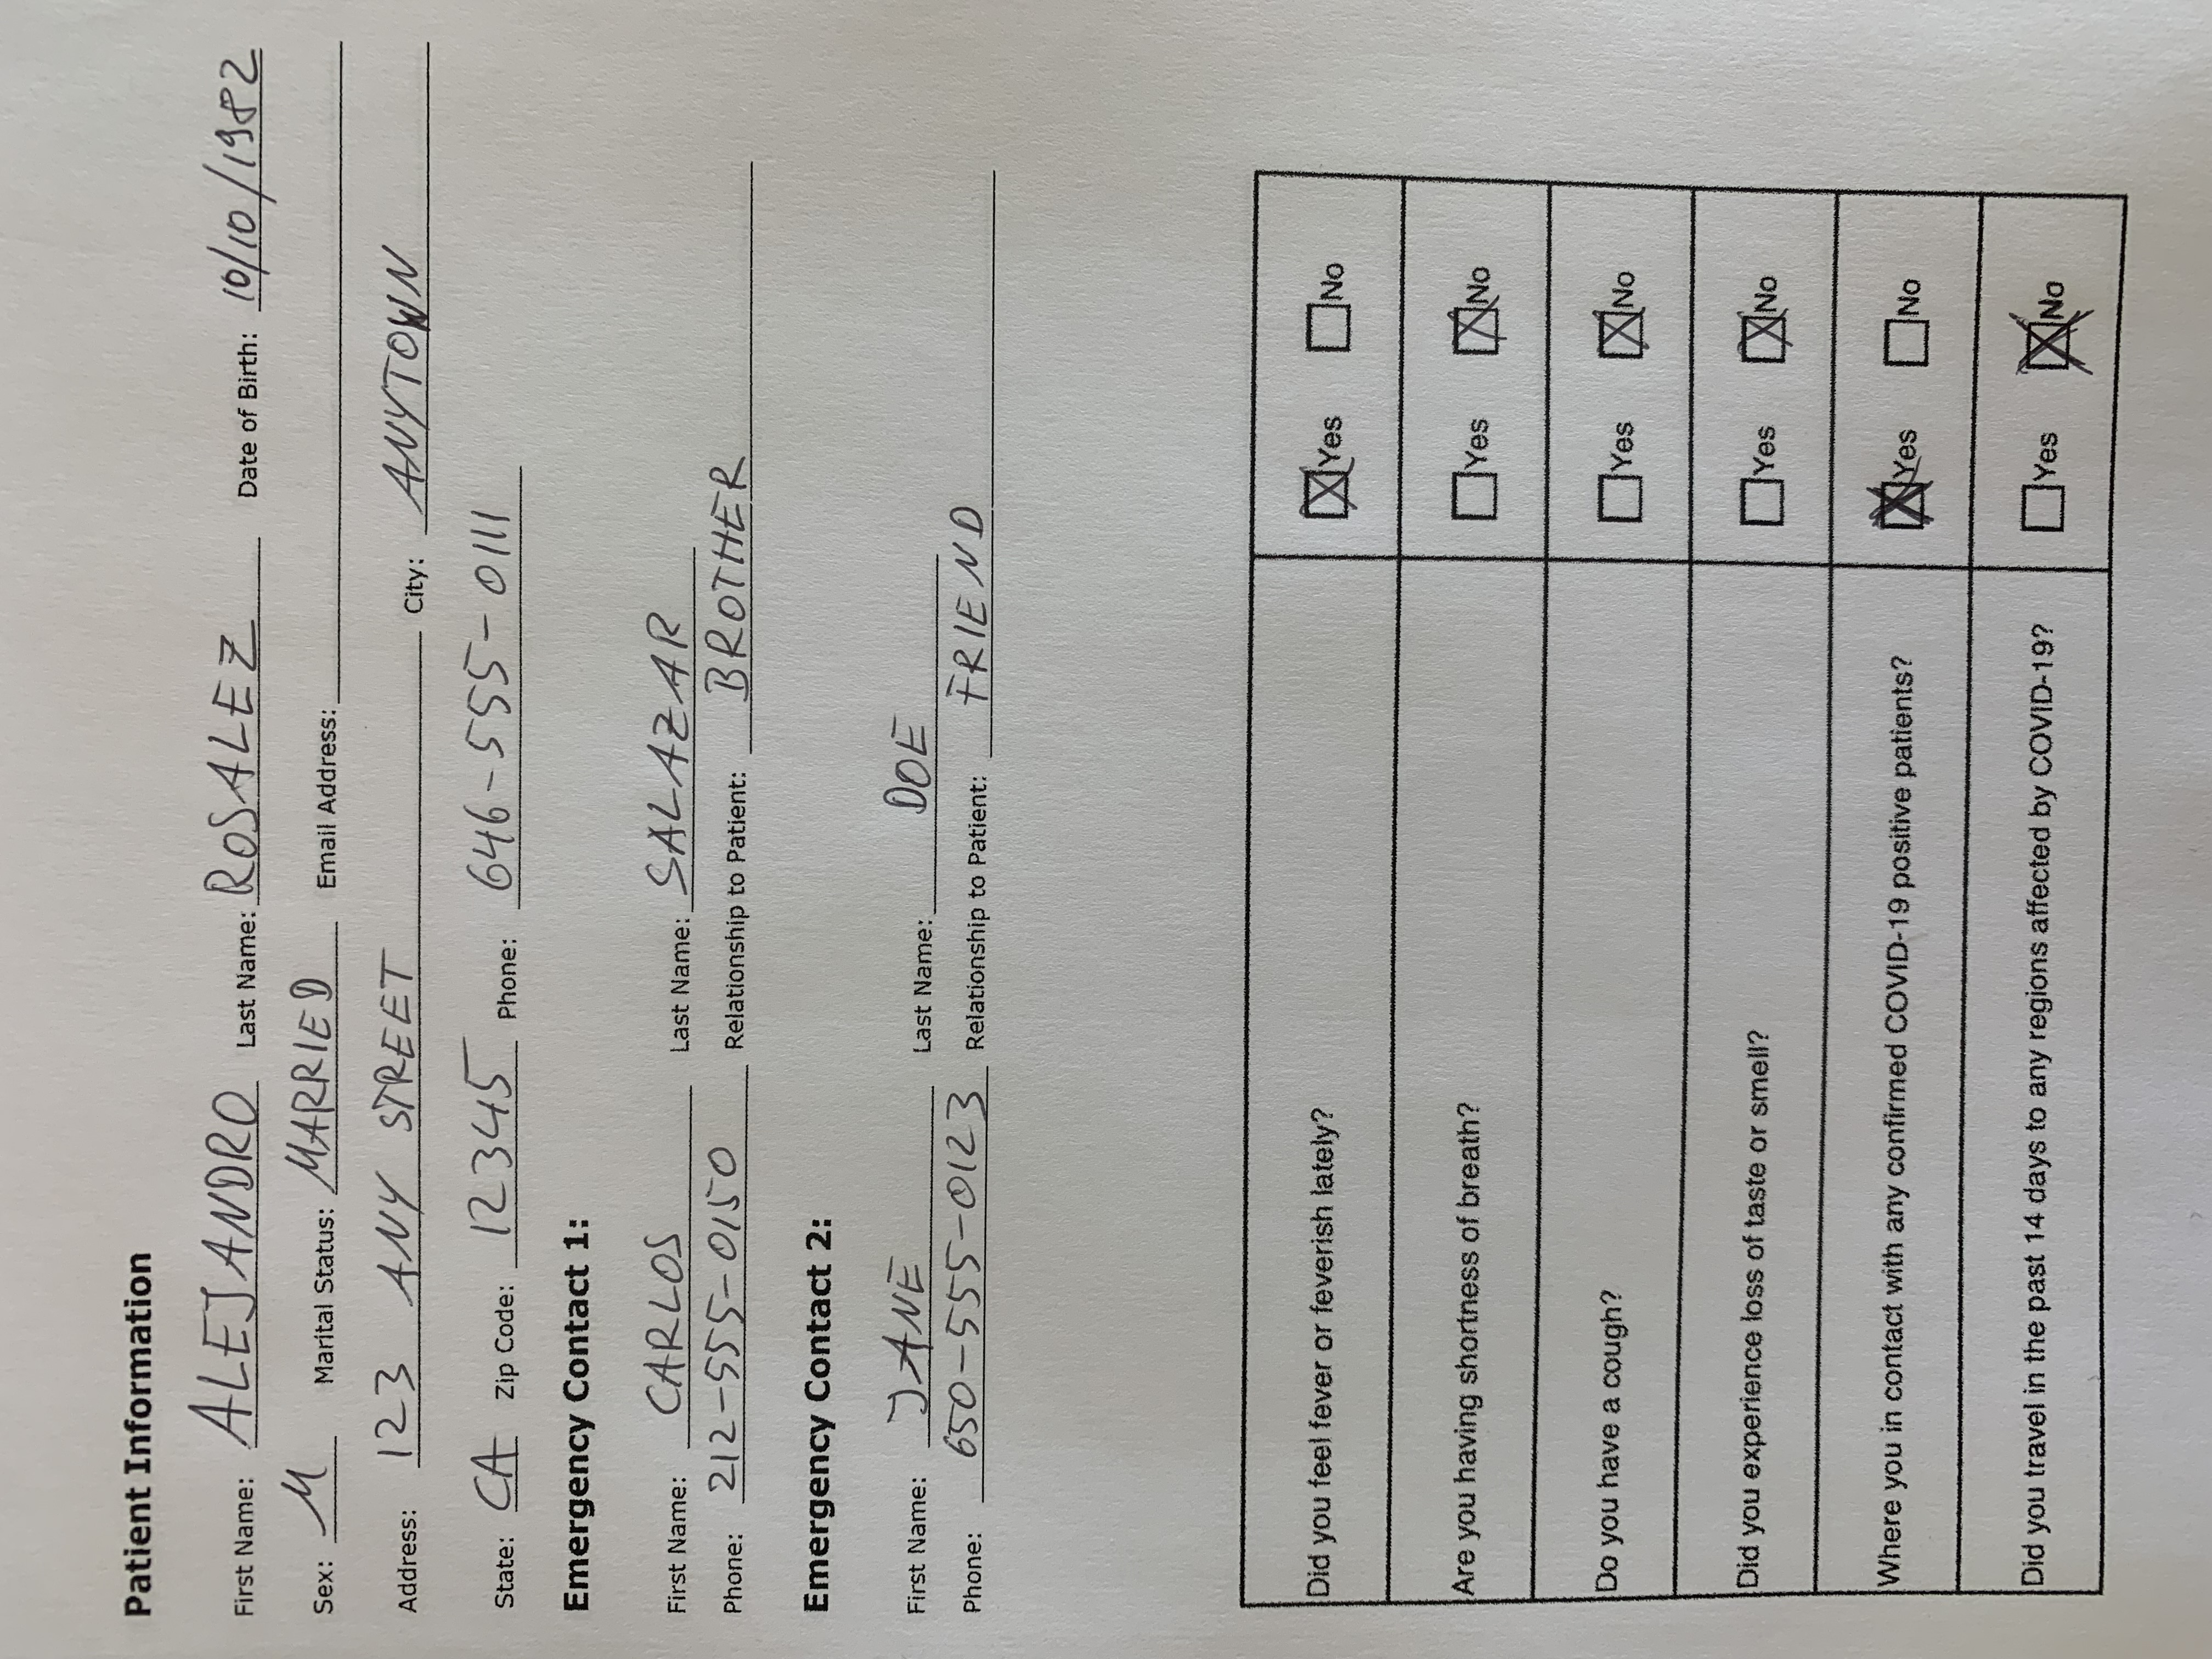

In [35]:
#new image
imageName="patient_intake_form_sample.jpg"

#display the image
from IPython.display import Image
Image(imageName)

In [37]:
!python -m pip install amazon-textract-prettyprinter

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [38]:
#format Textract output and print in CSV format 
from textractprettyprinter.t_pretty_print import Pretty_Print_Table_Format, Textract_Pretty_Print, get_string, get_tables_string
from textractcaller.t_call import Textract_Features, Textract_Types, call_textract

textract_json = call_textract(input_document= imageName, features=[Textract_Features.FORMS, Textract_Features.TABLES])
print(get_string(textract_json=textract_json,
               table_format=Pretty_Print_Table_Format.csv,
               output_type=[Textract_Pretty_Print.FORMS, Textract_Pretty_Print.TABLES]))

Key,Value
First Name:,ALEJANDRO
First Name:,CARLOS
Relationship to Patient:,BROTHER
First Name:,JANE
Marital Status:,MARRIED
Phone:,646-555-0111
Last Name:,SALAZAR
Phone:,212-555-0150
Relationship to Patient:,FRIEND
Last Name:,ROSALEZ
City:,ANYTOWN
Phone:,650-555-0123
Address:,123 ANY STREET
Yes,SELECTED
Yes,NOT_SELECTED
Date of Birth:,10/10/1982
Last Name:,DOE
Sex:,M
Yes,NOT_SELECTED
Yes,NOT_SELECTED
Yes,NOT_SELECTED
State:,CA
Zip Code:,12345
Email Address:,
No,NOT_SELECTED
No,SELECTED
No,NOT_SELECTED
Yes,SELECTED
No,SELECTED
No,SELECTED
No,SELECTED

,Did you feel fever or feverish lately? ,"SELECTED, NOT_SELECTED, Yes No ",
,Are you having shortness of breath? ,"SELECTED, NOT_SELECTED, Yes No ",
,Do you have a cough? ,"SELECTED, NOT_SELECTED, Yes No ",
,Did you experience loss of taste or smell? ,"NOT_SELECTED, SELECTED, Yes No ",
,Where you in contact with any confirmed COVID-19 positive patients? ,"SELECTED, NOT_SELECTED, Yes No ",
,Did you travel in the past 14 days to any regions

In [39]:
#call Textract
j = call_textract(input_document=imageName, features=[Textract_Features.FORMS])

#Print the key/value pairs to identify the ones that have the same name. 
from textractprettyprinter.t_pretty_print import get_forms_string
print(get_forms_string(j))

|--------------------------|----------------|
| Key                      | Value          |
| First Name:              | ALEJANDRO      |
| First Name:              | CARLOS         |
| Relationship to Patient: | BROTHER        |
| First Name:              | JANE           |
| Marital Status:          | MARRIED        |
| Phone:                   | 646-555-0111   |
| Last Name:               | SALAZAR        |
| Phone:                   | 212-555-0150   |
| Relationship to Patient: | FRIEND         |
| Last Name:               | ROSALEZ        |
| City:                    | ANYTOWN        |
| Phone:                   | 650-555-0123   |
| Address:                 | 123 ANY STREET |
| Yes                      | SELECTED       |
| Yes                      | NOT_SELECTED   |
| Date of Birth:           | 10/10/1982     |
| Last Name:               | DOE            |
| Sex:                     | M              |
| Yes                      | NOT_SELECTED   |
| Yes                      | NOT_S